## Preprocessing

**Converting Files to .txt format**

In [ ]:
'''
import os
path = '/Users/Yash/Desktop/College_Imp_material/NLC/New_proj/ohsumed-all/'
files = os.listdir(path)
label=[]

for dirname, _ , filenames in os.walk(path):
    print('Directory: ', dirname)
    print('Subdir: ', dirname.split('/')[-1])
    #print('subdir',dirname)
    p=''
    p = path+dirname.split('/')[-1]
    for index,filename in enumerate(filenames):
        os.rename(os.path.join(p, filename), os.path.join(p, ''.join([str(index), '.txt'])))
'''

In [ ]:
#pip install nltk

In [ ]:
#pip install scikit-learn

In [178]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import re, os
#from sklearn.preprocessing import LabelEncoder
#from nltk.corpus import stopwords
#from sklearn.model_selection import train_test_split


In [ ]:
# Step 1 - Get the file details
'''
directory = []
file = []
title = []
text = []
label = []
datapath = '/Users/Yash/Desktop/College_Imp_material/NLC/New_proj/ohsumed-all/'

for dirname, _ , filenames in os.walk(datapath):
    print('Directory: ', dirname)
    print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        # Appending Labels
        label.append(dirname.split('/')[-1])
        #print(filename)
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    # Appending first line to title
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            # Appending text
            text.append(intext)

'''

In [ ]:
#dic = {'C01':'Bacterial Infections and Mycoses','C02':'Virus Diseases','C03':'Parasitic Diseases','C04':'Neoplasms','C05':'Musculoskeletal Diseases','C06':'Digestive System Diseases','C07':'Stomatognathic Diseases','C08':'Respiratory Tract Diseases','C09':'Otorhinolaryngologic Diseases','C10':'Nervous System Diseases','C11':'Eye Diseases','C12':'Urologic and Male Genital Diseases','C13':'Female Genital Diseases and Pregnancy Complications','C14':'Cardiovascular Diseases','C15':'Hemic and Lymphatic Diseases','C16':'Neonatal Diseases and Abnormalities','C17':'Skin and Connective Tissue Diseases','C18':'Nutritional and Metabolic Diseases','C19':'Endocrine Diseases','C20':'Immunological Diseases','C21':'Disorders of Environmental Origin','C22':'Animal Diseases','C23':'Pathological Conditions, Signs and Symptoms'}
#label = [dic.get(n, n) for n in label]

#for i in label:
#    print(i)

In [ ]:
#fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
#               columns =['directory', 'file', 'title', 'text', 'label'])

#df = fulldf.filter(['title','text','label'], axis=1)

#print("FullDf : ", fulldf.shape)
#print("DF : ", df.shape)

In [ ]:
#df.head()

In [ ]:
#type(df)

In [ ]:
#df['label'].unique()

In [ ]:
#df.info()

In [1]:
#df.to_csv(r'C:\Users\Yash\Desktop\College_Imp_material\NLC\New_proj\23_diseases_data.csv', index=False)

### Start

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, os
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
import eli5
from IPython.display import Image


In [42]:
df = pd.read_csv('C:/Users/Yash/Desktop/College_Imp_material/NLC/New_proj/23_diseases_data.csv')
df.head()

,title,text,label
0,Haemophilus influenzae meningitis with prolong...,A retrospective evaluation of Haemophilus in...,Bacterial Infections and Mycoses
1,Augmentation mentoplasty using Mersilene mesh.,Many different materials are available for a...,Bacterial Infections and Mycoses
2,"Catheter-related sepsis: prospective, randomiz...",We studied the infectious risk of different ...,Bacterial Infections and Mycoses
3,Pulmonary disease following intravesical BCG t...,Bacillus Calmette-Guerin (BCG) is an attenua...,Bacterial Infections and Mycoses
4,Complications of indwelling central venous cat...,Complications associated with indwelling cen...,Bacterial Infections and Mycoses


In [43]:
df['label'].unique()

array(['Bacterial Infections and Mycoses', 'Virus Diseases',
       'Parasitic Diseases', 'Neoplasms', 'Musculoskeletal Diseases',
       'Digestive System Diseases', 'Stomatognathic Diseases',
       'Respiratory Tract Diseases', 'Otorhinolaryngologic Diseases',
       'Nervous System Diseases', 'Eye Diseases',
       'Urologic and Male Genital Diseases',
       'Female Genital Diseases and Pregnancy Complications',
       'Cardiovascular Diseases', 'Hemic and Lymphatic Diseases',
       'Neonatal Diseases and Abnormalities',
       'Skin and Connective Tissue Diseases',
       'Nutritional and Metabolic Diseases', 'Endocrine Diseases',
       'Immunological Diseases', 'Disorders of Environmental Origin',
       'Animal Diseases', 'Pathological Conditions, Signs and Symptoms'],
      dtype=object)

In [44]:
df['label'].value_counts()

Pathological Conditions, Signs and Symptoms            9611
Neoplasms                                              6327
Cardiovascular Diseases                                6102
Nervous System Diseases                                3851
Immunological Diseases                                 3116
Digestive System Diseases                              2989
Disorders of Environmental Origin                      2933
Respiratory Tract Diseases                             2589
Bacterial Infections and Mycoses                       2540
Urologic and Male Genital Diseases                     2518
Nutritional and Metabolic Diseases                     1919
Musculoskeletal Diseases                               1678
Female Genital Diseases and Pregnancy Complications    1623
Skin and Connective Tissue Diseases                    1617
Hemic and Lymphatic Diseases                           1277
Virus Diseases                                         1171
Neonatal Diseases and Abnormalities     

In [45]:
df['label'].value_counts().sum()

56984

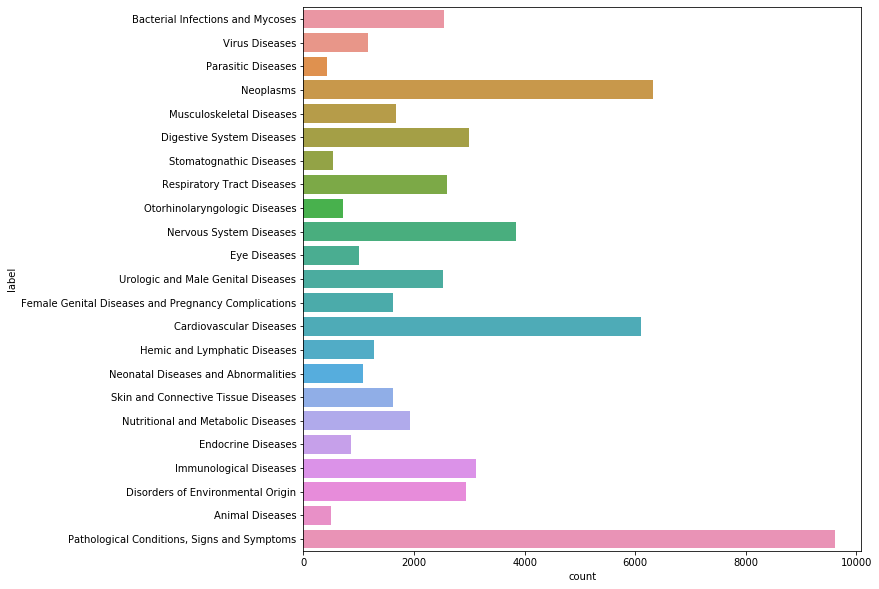

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(y='label', data = df )
plt.show()

In [47]:
df.set_index('label', inplace=True)

In [48]:
df.head()

,title,text
label,,
Bacterial Infections and Mycoses,Haemophilus influenzae meningitis with prolong...,A retrospective evaluation of Haemophilus in...
Bacterial Infections and Mycoses,Augmentation mentoplasty using Mersilene mesh.,Many different materials are available for a...
Bacterial Infections and Mycoses,"Catheter-related sepsis: prospective, randomiz...",We studied the infectious risk of different ...
Bacterial Infections and Mycoses,Pulmonary disease following intravesical BCG t...,Bacillus Calmette-Guerin (BCG) is an attenua...
Bacterial Infections and Mycoses,Complications of indwelling central venous cat...,Complications associated with indwelling cen...


### Dropping some classes

In [49]:
df.drop("Musculoskeletal Diseases",inplace=True)
df.drop("Bacterial Infections and Mycoses",inplace=True)
df.drop("Animal Diseases",inplace=True)
df.drop("Pathological Conditions, Signs and Symptoms",inplace=True)
df.drop("Nutritional and Metabolic Diseases",inplace=True)
df.drop("Neonatal Diseases and Abnormalities",inplace=True)
df.drop("Disorders of Environmental Origin",inplace=True)
df.drop("Female Genital Diseases and Pregnancy Complications",inplace=True)
df.drop("Urologic and Male Genital Diseases",inplace=True)
df.drop("Otorhinolaryngologic Diseases",inplace=True)
df.drop("Stomatognathic Diseases",inplace=True)
df.drop("Digestive System Diseases",inplace=True)
df.drop("Neoplasms",inplace=True)
df.drop("Hemic and Lymphatic Diseases",inplace=True)
df.drop("Immunological Diseases",inplace=True)

In [50]:
df.reset_index(inplace=True)

In [51]:
df.head()

,label,title,text
0,Virus Diseases,Varicella with delayed hemiplegia.,We report 4 children who developed acute hem...
1,Virus Diseases,Abnormal differentiation of human papillomavir...,We studied the proliferation and differentia...
2,Virus Diseases,Itraconazole therapy in aspergillosis: study i...,"Itraconazole, 200 to 400 mg once daily, was ..."
3,Virus Diseases,Clinical and pathological features of bacillar...,BACKGROUND. Peliosis hepatis is characteriz...
4,Virus Diseases,Distribution of Crimean-Congo hemorrhagic feve...,The spatial pattern in Senegal of Crimean-Co...


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17620 entries, 0 to 17619
Data columns (total 3 columns):
label    17620 non-null object
title    17620 non-null object
text     17620 non-null object
dtypes: object(3)
memory usage: 413.0+ KB


In [53]:
df['label'].unique()

array(['Virus Diseases', 'Parasitic Diseases',
       'Respiratory Tract Diseases', 'Nervous System Diseases',
       'Eye Diseases', 'Cardiovascular Diseases',
       'Skin and Connective Tissue Diseases', 'Endocrine Diseases'],
      dtype=object)

In [54]:
df['label'].value_counts()

Cardiovascular Diseases                6102
Nervous System Diseases                3851
Respiratory Tract Diseases             2589
Skin and Connective Tissue Diseases    1617
Virus Diseases                         1171
Eye Diseases                            998
Endocrine Diseases                      865
Parasitic Diseases                      427
Name: label, dtype: int64

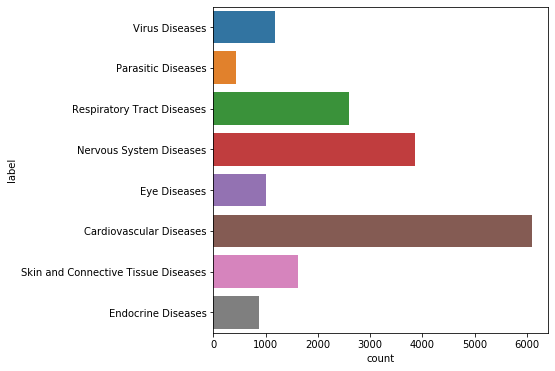

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(y='label', data = df )
plt.show()

In [56]:
df['text'][1]

'  We studied the proliferation and differentiation of human laryngeal papillomas, which are benign tumors induced by human papillomaviruses.  Immunofluorescent stains of tissues for a number of differentiation-specific proteins showed abnormal differentiation.  Papilloma tissue fragments in vitro showed a slightly decreased fraction of proliferating cells that incorporated tritiated thymidine and a markedly reduced incorporation of tritiated uridine when compared with normal tissue.  We propose that papillomavirus infection results in normal basal cell proliferation but abnormal terminal differentiation and that this abnormality significantly contributes to the hyperplasia of the papillomas.'

In [17]:
for i in range(3):
    print(df['text'][i])

  We report 4 children who developed acute hemiplegia 7 weeks to 4 months after varicella infection.  In 2 patients, carotid angiography demonstrated segmental narrowing and occlusion of the middle cerebral artery.  Their clinical and angiographic features were similar to those associated with contralateral hemiplegia after herpes zoster ophthalmicus, the pathogenesis of which comprises cerebral angiitis due to varicella zoster viral infection.  We believe that our patients had the same pathogenesis.  In a survey of infectious diseases in our region, the frequency of varicella with delayed hemiparesis was roughly 1:6,500 varicella patients.
  We studied the proliferation and differentiation of human laryngeal papillomas, which are benign tumors induced by human papillomaviruses.  Immunofluorescent stains of tissues for a number of differentiation-specific proteins showed abnormal differentiation.  Papilloma tissue fragments in vitro showed a slightly decreased fraction of proliferating

In [66]:
#df.drop(['T'],inplace=True,axis=1)

In [228]:
#df.head()

In [224]:
#df['T']=df['text']

In [225]:
#df['T'][0]

In [229]:
#for i,wd in enumerate(df['T']):
#    if i==3:
#        break
#    print(df['T'][i])

In [226]:
#for i in range(3):
#    print(df['T'][i])

In [227]:
#df.head()

In [18]:
for i in range(3):
    print(df['text'][i])

  We report 4 children who developed acute hemiplegia 7 weeks to 4 months after varicella infection.  In 2 patients, carotid angiography demonstrated segmental narrowing and occlusion of the middle cerebral artery.  Their clinical and angiographic features were similar to those associated with contralateral hemiplegia after herpes zoster ophthalmicus, the pathogenesis of which comprises cerebral angiitis due to varicella zoster viral infection.  We believe that our patients had the same pathogenesis.  In a survey of infectious diseases in our region, the frequency of varicella with delayed hemiparesis was roughly 1:6,500 varicella patients.
  We studied the proliferation and differentiation of human laryngeal papillomas, which are benign tumors induced by human papillomaviruses.  Immunofluorescent stains of tissues for a number of differentiation-specific proteins showed abnormal differentiation.  Papilloma tissue fragments in vitro showed a slightly decreased fraction of proliferating

In [233]:
#df.drop(['T'],inplace=True,axis=1)
#df.head()

In [85]:
df['text'][1]

'  We studied the proliferation and differentiation of human laryngeal papillomas, which are benign tumors induced by human papillomaviruses.  Immunofluorescent stains of tissues for a number of differentiation-specific proteins showed abnormal differentiation.  Papilloma tissue fragments in vitro showed a slightly decreased fraction of proliferating cells that incorporated tritiated thymidine and a markedly reduced incorporation of tritiated uridine when compared with normal tissue.  We propose that papillomavirus infection results in normal basal cell proliferation but abnormal terminal differentiation and that this abnormality significantly contributes to the hyperplasia of the papillomas.'

In [161]:
for i,w in enumerate(df['text']):
    if i==1:
        break
    print(type(w))
    
    l=w.lower().split()
    #for j in w:
        #l.append(j)
    print(l)

<class 'str'>
['we', 'report', '4', 'children', 'who', 'developed', 'acute', 'hemiplegia', '7', 'weeks', 'to', '4', 'months', 'after', 'varicella', 'infection.', 'in', '2', 'patients,', 'carotid', 'angiography', 'demonstrated', 'segmental', 'narrowing', 'and', 'occlusion', 'of', 'the', 'middle', 'cerebral', 'artery.', 'their', 'clinical', 'and', 'angiographic', 'features', 'were', 'similar', 'to', 'those', 'associated', 'with', 'contralateral', 'hemiplegia', 'after', 'herpes', 'zoster', 'ophthalmicus,', 'the', 'pathogenesis', 'of', 'which', 'comprises', 'cerebral', 'angiitis', 'due', 'to', 'varicella', 'zoster', 'viral', 'infection.', 'we', 'believe', 'that', 'our', 'patients', 'had', 'the', 'same', 'pathogenesis.', 'in', 'a', 'survey', 'of', 'infectious', 'diseases', 'in', 'our', 'region,', 'the', 'frequency', 'of', 'varicella', 'with', 'delayed', 'hemiparesis', 'was', 'roughly', '1:6,500', 'varicella', 'patients.']


### Clean function for Preprocessing

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stops = set(stopwords.words("english"))

#Removes Stopwords, Special characters and numbers

def clean(lis):
    for i,instance in enumerate(lis):
        l = word_tokenize(instance.lower())  
        tex=""
        for j,word in enumerate(l):
            if word in stops:
                l[j]=' '
            if l[j].isspace()==False:
                l[j] = re.sub('[^A-Za-z]',' ',word)
            if l[j].isalpha()==True:
                tex+=" "+l[j]

        lis[i] = tex        
    return lis;


In [14]:
#cd = df['text']
#clean(cd)

In [57]:
clean(df['text'])

0         report children developed acute hemiplegia we...
1         studied proliferation differentiation human l...
2         itraconazole mg daily administered patients d...
3         background peliosis hepatis characterized cys...
4         spatial pattern senegal hemorrhagic fever cch...
5         hepatitis c virus hcv rna detected sera patie...
6         cdna clone bearing epitope aminoacid sequence...
7         influenza activity united states monitored cd...
8         association infections respiratory syncytial ...
9         polymerase chain reaction pcr detected specif...
10        important functions influenza surveillance in...
11        revised immunization practices advisory commi...
12        clinical characteristics acute otitis media r...
13        purpose investigate combined usefulness lymph...
14        background identified motile curved bacillus ...
15        purpose order assess relation thyroid functio...
16        open study treatment patients complex arc aid.

In [21]:
df.describe()

,label,title,text
count,17620,17620,17620
unique,8,15744,15741
top,Cardiovascular Diseases,Thyrotoxicosis induced by topical iodine appli...,afferent visual pathways ocular motor system ...
freq,6102,4,4


In [88]:
df['text'][0]

' report children developed acute hemiplegia weeks months varicella carotid angiography demonstrated segmental narrowing occlusion middle cerebral clinical angiographic features similar associated contralateral hemiplegia herpes zoster pathogenesis comprises cerebral angiitis due varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis roughly varicella'

In [89]:
for i in range(3):
    print(df['text'][i])

 report children developed acute hemiplegia weeks months varicella carotid angiography demonstrated segmental narrowing occlusion middle cerebral clinical angiographic features similar associated contralateral hemiplegia herpes zoster pathogenesis comprises cerebral angiitis due varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis roughly varicella
 studied proliferation differentiation human laryngeal benign tumors induced human immunofluorescent stains tissues number proteins showed abnormal papilloma tissue fragments vitro showed slightly decreased fraction proliferating cells incorporated tritiated thymidine markedly reduced incorporation tritiated uridine compared normal propose papillomavirus infection results normal basal cell proliferation abnormal terminal differentiation abnormality significantly contributes hyperplasia
 mg administered patients different types pulmonary aspergilloma chronic necrotizing pulmonary aspergill

In [210]:
#type(df['text'])

In [23]:
#print(type(cd))
#cd = pd.DataFrame([cd])
#print(type(cd))

In [ ]:
#df.reset_index(drop=True,inplace=True)
#cd.reset_index(drop=True,inplace=True)
#final = pd.concat([df,cd],axis=1)
#final

In [21]:
#result = pd.concat([df, cd], axis=1)

### Using Scispacy en_core_sci_sm model

In [20]:
import scispacy
import spacy

nlp = spacy.load("en_core_sci_sm")
text = """
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity. 
They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC).
"""
doc = nlp(text)

print(list(doc.sents))

# Examine the entities extracted by the mention detector.
# Note that they don't have types like in SpaCy, and they
# are more general (e.g including verbs) - these are any
# spans which might be an entity in UMLS, a large
# biomedical database.
print(doc.ents)


# We can also visualise dependency parses
# (This renders automatically inside a jupyter notebook!):
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)

# See below for the generated SVG.
# Zoom your browser in a bit!


[
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity., 
They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC)., 
]
(Myeloid, suppressor cells, MDSC, immature, myeloid cells, immunosuppressive activity, accumulate, tumor-bearing mice, humans, cancer, hepatocellular 
carcinoma, HCC)


In [23]:
a=[]
for i in enumerate(df['text']):
    if i==2:
        break
    a.append(line)

NameError: name 'line' is not defined

In [ ]:
a

In [ ]:
from nltk.tokenize import word_tokenize
st=[" We report 4 children who developed acute hemiplegia 7 weeks to 4 months after varicella infection.  In 2 patients, carotid angiography demonstrated segmental narrowing and occlusion of the middle cerebral artery.  Their clinical and angiographic features were similar to those associated with contralateral hemiplegia after herpes zoster ophthalmicus, the pathogenesis of which comprises cerebral angiitis due to varicella zoster viral infection.  We believe that our patients had the same pathogenesis.  In a survey of infectious diseases in our region, the frequency of varicella with delayed hemiparesis was roughly 1:6,500 varicella patients.","We studied the proliferation and differentiation of human laryngeal papillomas, which are benign tumors induced by human papillomaviruses.  Immunofluorescent stains of tissues for a number of differentiation-specific proteins showed abnormal differentiation.  Papilloma tissue fragments in vitro showed a slightly decreased fraction of proliferating cells that incorporated tritiated thymidine and a markedly reduced incorporation of tritiated uridine when compared with normal tissue.  We propose that papillomavirus infection results in normal basal cell proliferation but abnormal terminal differentiation and that this abnormality significantly contributes to the hyperplasia of the papillomas."]
print(st)
for i,instance in enumerate(st):
        #l = 
        l = word_tokenize(instance.lower())#instance.lower().split()
        #l.lower() 
        tex=""
        for j,word in enumerate(l):
            if word in stops:
                l[j]=' '
            if l[j].isspace()==False:
                l[j] = re.sub('[^A-Za-z]',' ',word)
            if l[j].isalpha()==True:
                tex+=" "+l[j]
        
        st[i]=tex
        print(tex)
        '''
        tex=""
        for j,word in enumerate(l):
            if word in stops:
                l[j]=' '
            if l[j].isspace()==False:
                l[j] = re.sub('[^A-Za-z]',' ',word)
            if l[j].isalpha()==True:
                tex+=" "+l[j]

        st[i] = tex        
    #return lis;'''

In [ ]:
st

In [ ]:
st[0]

In [ ]:
for i in range(2):
    print(df['text'][i])

### Function to extract biomedical entities

In [21]:
import scispacy
import spacy
nlp = spacy.load("en_core_sci_sm")

def select_med_terms(lis):
    for i,line in enumerate(lis):
        a=""
        d = nlp(lis[i])
        tex = [t.text for t in d.ents]   #print(word)
        t=""
        for j in tex:
            t+=" "+j
        for word in line.split():
            if word in t:
                a+=" "+word
        lis[i]=a
        print(i)
    return lis;
    

In [22]:
select_med_terms(st)

NameError: name 'st' is not defined

In [26]:
len(st[0].split())

NameError: name 'st' is not defined

In [23]:
#df['T']=select_med_terms(df['text'])
select_med_terms(df['text'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
print(d.ents)
listmain= [t.text for t in d.ents]

In [ ]:
df['text'][0]

In [ ]:
#select_med_terms(df['text'])

In [ ]:
for i in range(5):
    print(df['text'][i])

### Experimentation


In [66]:
st

[' report children developed acute hemiplegia weeks months varicella carotid angiography demonstrated segmental narrowing occlusion middle cerebral clinical angiographic features similar associated contralateral hemiplegia herpes zoster pathogenesis comprises cerebral angiitis due varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis roughly varicella',
 ' studied proliferation differentiation human laryngeal benign tumors induced human immunofluorescent stains tissues number proteins showed abnormal papilloma tissue fragments vitro showed slightly decreased fraction proliferating cells incorporated tritiated thymidine markedly reduced incorporation tritiated uridine compared normal propose papillomavirus infection results normal basal cell proliferation abnormal terminal differentiation abnormality significantly contributes hyperplasia']

In [90]:
len(df['text'][0].split())

33

In [75]:
print(st[0])
text=[]
for i,line in enumerate(st):
    a=""
    d = nlp(st[i])
    tex = [t.text for t in d.ents]   #print(word)
    t=""
    for j in listmain:
        t+=" "+j
    for word in line.split():
        if word in t:
            a+=" "+word
    st[i]=a
print(st[0])

 report children developed acute hemiplegia weeks months varicella carotid angiography demonstrated segmental narrowing occlusion middle cerebral clinical angiographic features similar associated contralateral hemiplegia herpes zoster pathogenesis comprises cerebral angiitis due varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis roughly varicella
 children acute hemiplegia months varicella carotid angiography segmental narrowing occlusion middle cerebral clinical angiographic contralateral hemiplegia zoster pathogenesis cerebral angiitis varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis varicella


In [52]:
listmain

['children',
 'acute hemiplegia',
 'months',
 'varicella',
 'carotid angiography',
 'segmental narrowing',
 'occlusion',
 'middle cerebral clinical angiographic',
 'contralateral',
 'pathogenesis',
 'cerebral angiitis',
 'varicella',
 'zoster',
 'viral believe',
 'patients',
 'survey',
 'infectious diseases',
 'frequency',
 'varicella',
 'delayed hemiparesis',
 'varicella']

In [53]:
t=""
for i in listmain:
    t+=" "+i
t

' children acute hemiplegia months varicella carotid angiography segmental narrowing occlusion middle cerebral clinical angiographic contralateral pathogenesis cerebral angiitis varicella zoster viral believe patients survey infectious diseases frequency varicella delayed hemiparesis varicella'

In [64]:
#listmain
text=""
print(st[0])
for i in st[0].split():
    if i in t:
        text+=" "+i

print(text)

In [58]:
#type(text)
#print(len(st[0].split()))
#print(len(text.split()))

44
33


In [223]:
#tex=""
#for i in d.ents:
#    tex+=" "+i.tostring()

In [81]:
df.head(20)

,label,title,text
0,Virus Diseases,Varicella with delayed hemiplegia.,report children developed acute hemiplegia we...
1,Virus Diseases,Abnormal differentiation of human papillomavir...,studied proliferation differentiation human l...
2,Virus Diseases,Itraconazole therapy in aspergillosis: study i...,itraconazole mg daily administered patients d...
3,Virus Diseases,Clinical and pathological features of bacillar...,background peliosis hepatis characterized cys...
4,Virus Diseases,Distribution of Crimean-Congo hemorrhagic feve...,spatial pattern senegal hemorrhagic fever cch...
5,Virus Diseases,Detection of hepatitis C virus ribonucleic aci...,hepatitis c virus hcv rna detected sera patie...
6,Virus Diseases,"Non-A, non-B hepatitis specific antibodies dir...",cdna clone bearing epitope aminoacid sequence...
7,Virus Diseases,Update: influenza activity--United States and ...,influenza activity united states monitored cd...
8,Virus Diseases,Excessive secretion of antidiuretic hormone in...,association infections respiratory syncytial ...
9,Virus Diseases,Hepatitis C quantification and sequencing in b...,polymerase chain reaction pcr detected specif...


In [162]:
#l = l.lower()
for i,word in enumerate(l):
    if word in stops:
        l[i]=' '
    if l[i].isspace()==False:
        l[i] = re.sub('[^A-Za-z]',' ',word)
print(l)

[' ', 'report', ' ', 'children', ' ', 'developed', 'acute', 'hemiplegia', ' ', 'weeks', ' ', ' ', 'months', ' ', 'varicella', 'infection ', ' ', ' ', 'patients ', 'carotid', 'angiography', 'demonstrated', 'segmental', 'narrowing', ' ', 'occlusion', ' ', ' ', 'middle', 'cerebral', 'artery ', ' ', 'clinical', ' ', 'angiographic', 'features', ' ', 'similar', ' ', ' ', 'associated', ' ', 'contralateral', 'hemiplegia', ' ', 'herpes', 'zoster', 'ophthalmicus ', ' ', 'pathogenesis', ' ', ' ', 'comprises', 'cerebral', 'angiitis', 'due', ' ', 'varicella', 'zoster', 'viral', 'infection ', ' ', 'believe', ' ', ' ', 'patients', ' ', ' ', ' ', 'pathogenesis ', ' ', ' ', 'survey', ' ', 'infectious', 'diseases', ' ', ' ', 'region ', ' ', 'frequency', ' ', 'varicella', ' ', 'delayed', 'hemiparesis', ' ', 'roughly', '       ', 'varicella', 'patients ']


In [163]:
tex=""
for i in l:
    if i.isspace()==False:
        tex+=" "+i

In [164]:
print(type(tex))
print(tex)

<class 'str'>
 report children developed acute hemiplegia weeks months varicella infection  patients  carotid angiography demonstrated segmental narrowing occlusion middle cerebral artery  clinical angiographic features similar associated contralateral hemiplegia herpes zoster ophthalmicus  pathogenesis comprises cerebral angiitis due varicella zoster viral infection  believe patients pathogenesis  survey infectious diseases region  frequency varicella delayed hemiparesis roughly varicella patients 


In [165]:
doc = nlp(tex)
print(doc.ents)

(children, acute hemiplegia, weeks, months, varicella, infection, patients, carotid angiography, segmental narrowing, occlusion, middle cerebral artery, clinical angiographic, contralateral, pathogenesis, comprises, cerebral angiitis, varicella, zoster, viral infection, patients, pathogenesis, survey, infectious diseases, frequency, delayed hemiparesis, varicella, patients)


In [166]:
a=doc.ents
print(type(a))
a

<class 'tuple'>


(children,
 acute hemiplegia,
 weeks,
 months,
 varicella,
 infection,
 patients,
 carotid angiography,
 segmental narrowing,
 occlusion,
 middle cerebral artery,
 clinical angiographic,
 contralateral,
 pathogenesis,
 comprises,
 cerebral angiitis,
 varicella,
 zoster,
 viral infection,
 patients,
 pathogenesis,
 survey,
 infectious diseases,
 frequency,
 delayed hemiparesis,
 varicella,
 patients)

In [169]:
st=[tex]

In [201]:

# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(fr)


# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf value:')
print(result)
  
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


Word indexes:
{'report': 59, 'children': 14, 'developed': 23, 'acute': 2, 'hemiplegia': 32, 'weeks': 80, 'months': 45, 'varicella': 77, 'carotid': 10, 'angiography': 5, 'demonstrated': 22, 'segmental': 62, 'narrowing': 46, 'occlusion': 49, 'middle': 44, 'cerebral': 13, 'clinical': 15, 'angiographic': 4, 'features': 27, 'similar': 65, 'associated': 6, 'contralateral': 18, 'herpes': 33, 'zoster': 81, 'pathogenesis': 52, 'comprises': 17, 'angiitis': 3, 'due': 26, 'viral': 78, 'believe': 8, 'patients': 53, 'survey': 69, 'infectious': 41, 'diseases': 25, 'frequency': 30, 'delayed': 21, 'hemiparesis': 31, 'roughly': 61, 'studied': 68, 'proliferation': 55, 'differentiation': 24, 'human': 34, 'laryngeal': 42, 'benign': 9, 'tumors': 75, 'induced': 39, 'immunofluorescent': 36, 'stains': 67, 'tissues': 73, 'number': 48, 'proteins': 57, 'showed': 63, 'abnormal': 0, 'papilloma': 50, 'tissue': 72, 'fragments': 29, 'vitro': 79, 'slightly': 66, 'decreased': 20, 'fraction': 28, 'proliferating': 54, 'c

In [151]:
print(type(l))
#print(l)

<class 'list'>


In [ ]:
text_data=[]
for i,line in enumerate(df['text']):
    if i==2:
        break
    str=""
    for i in line:
        str+=i
    #print(str)
    text_data.append(str)

In [73]:
t="234 yash!@ is very good boy dancing over him, he is a bad person"

#

wrd=""
wrd = re.sub('[^A-Za-z]',' ',t)
#wrd = re.sub('\s+',' ',wrd)
wrd = (" ".join(wrd))
tex = word_tokenize(wrd)
#stops = set(stopwords.words("english"))
#or i in wrd:
#    wrd=re.sub("[^A-Za-z]"," ",i)
#    if not i in stops:
#       wrd+=" "+i
print(type(wrd))   

<class 'str'>


In [24]:
from nltk import word_tokenize
t="234 avcd!@ looks to be busy experimenting over various models, need to look after him. after all he is a my brother"
w = word_tokenize(t)

stops = set(stopwords.words("english"))
print(w)
for i,wr in enumerate(w):

    w[i] = re.sub('[^A-Za-z]',' ',wr)
    
    if wr in stops:
        w[i] = " "    

tex=""
for i in w:
    if i.isspace()==False:
        tex+=" "+i

print(w)
print(tex)

['234', 'avcd', '!', '@', 'looks', 'to', 'be', 'busy', 'experimenting', 'over', 'various', 'models', ',', 'need', 'to', 'look', 'after', 'him', '.', 'after', 'all', 'he', 'is', 'a', 'my', 'brother']
['   ', 'avcd', ' ', ' ', 'looks', ' ', ' ', 'busy', 'experimenting', ' ', 'various', 'models', ' ', 'need', ' ', 'look', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'brother']
 avcd looks busy experimenting various models need look brother


In [ ]:
 stops = set(stopwords.words("english"))
    for word in sent:
        item = re.sub("[^A-Za-z]"," ",word)
        
        
        if not item in stops:
            text+=" "+word
    
    print(type(sent))
    #print(sent_tokenize(sent))
    #for line in sent:
    #    print(line,"1")

In [40]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
print(stops)

{'as', 'so', 'yourself', 're', "you'll", 'her', 'his', "shouldn't", 's', 'most', 'here', 'few', 'other', 'about', 'mightn', "you're", 'to', 'did', 'those', 'during', 'hers', 'hadn', 'under', 'me', 'very', 'their', 'were', 'the', "she's", 'just', 'but', "needn't", 'only', 'themselves', 'same', 'himself', 'y', 'it', 'didn', 'off', 'each', "won't", 'being', 'of', "isn't", 'will', 'not', "should've", 'can', "weren't", 'into', "hasn't", 'ours', 'a', 'be', 'through', 'weren', 'is', 'both', 'which', 'if', 'with', 'we', 'my', "wouldn't", "couldn't", "hadn't", 'yourselves', 'll', 'ma', 'further', 'between', 'don', 'yours', 'having', 'at', "aren't", 'itself', 'they', 'whom', 'should', 'nor', 'wasn', 'when', 'that', 'on', 'd', "it's", 'won', 'haven', "mightn't", 'why', 'theirs', 'how', 'by', 'these', 'against', 'once', 'm', 'our', 'needn', "that'll", "didn't", 'who', 'some', 'ain', 'doesn', "doesn't", 'above', 'he', 'couldn', 'you', 'been', 'or', 'now', 'herself', 'no', 'over', 'myself', 'ourselv

In [222]:
#!python --version

In [221]:
#spacy.__version__

In [220]:
#scispacy.__version__

In [219]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

In [217]:
#!pip install scispacy

In [218]:
#!pip install spacy

In [28]:
df['label'].value_counts()

Cardiovascular Diseases                6102
Nervous System Diseases                3851
Respiratory Tract Diseases             2589
Skin and Connective Tissue Diseases    1617
Virus Diseases                         1171
Eye Diseases                            998
Endocrine Diseases                      865
Parasitic Diseases                      427
Name: label, dtype: int64

In [29]:
df['label'].value_counts().sum()

17620

In [209]:
#pip install eli5

In [16]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#text_transformer = TfidfVectorizer(stop_words='english', token_pattern=r'[A-Za-z]+',
#                                   ngram_range=(1, 2), lowercase=True, max_features=150000)

In [208]:
#type(df['text'][0])

In [207]:
#for i in range(3):
#    print(df['text'][i])

In [213]:
#vectorized.shape

### Using TfidfVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_transformer = TfidfVectorizer(ngram_range=(1, 2), analyzer='word',max_features=80000)
X=df['text']
text_transformer.fit(X)
vectorized = text_transformer.transform(X)
vectorized.shape

(17620, 80000)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(vectorized,df['label'], test_size=0.2,shuffle=True)
print("Train DF: ",X_train.shape)
print("Test DF: ",X_test.shape)

Train DF:  (14096, 80000)
Test DF:  (3524, 80000)


In [234]:
#%%time
#X_train_text = text_transformer.fit_transform(train['text'])
#X_test_text = text_transformer.transform(test['text'])

In [106]:
print(X_train)

  (0, 347)	0.05024953717884612
  (0, 497)	0.11195609087300436
  (0, 690)	0.07441627485944739
  (0, 7029)	0.22747244482346352
  (0, 7078)	0.10604695106400884
  (0, 7081)	0.10393788777672407
  (0, 11811)	0.1086282359112143
  (0, 15291)	0.03454325837560222
  (0, 29194)	0.03967984402799129
  (0, 29206)	0.06485340440272624
  (0, 33253)	0.041865233216610793
  (0, 33319)	0.11195609087300436
  (0, 34620)	0.06899815080109299
  (0, 36762)	0.06190978678979108
  (0, 41558)	0.20982286183796314
  (0, 41568)	0.22391218174600871
  (0, 41836)	0.12059052277086234
  (0, 41888)	0.08321113344967326
  (0, 43733)	0.04873513076411973
  (0, 43768)	0.1086282359112143
  (0, 44210)	0.1427857076633645
  (0, 44216)	0.11195609087300436
  (0, 44217)	0.07873701257974906
  (0, 48323)	0.060339667665850825
  (0, 53696)	0.042734982053099876
  :	:
  (14095, 51431)	0.06471701203622414
  (14095, 51472)	0.15278172190172634
  (14095, 57795)	0.08754789160993345
  (14095, 57817)	0.1657951111143945
  (14095, 64990)	0.069169837260

In [206]:
#X_train = X_train_text
#X_test = X_test_text
#print("X Train DF: ",X_train.shape)
#print("X Test DF: ", X_test.shape)

In [151]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report 

svm = LinearSVC(C=1.0)
svm1 = LinearSVC(C=10.0)
svm.fit(X_train,Y_train)
svm1.fit(X_train,Y_train)

LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [152]:
pred_svm = svm.predict(X_test)
pred_svm1 = svm1.predict(X_test)


In [153]:
print(classification_report(Y_test,pred_svm))
print(classification_report(Y_test,pred_svm1))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.77      0.81      0.79      1236
                 Endocrine Diseases       0.61      0.52      0.56       186
                       Eye Diseases       0.71      0.55      0.62       210
            Nervous System Diseases       0.64      0.70      0.67       744
                 Parasitic Diseases       0.69      0.57      0.62        77
         Respiratory Tract Diseases       0.67      0.69      0.68       502
Skin and Connective Tissue Diseases       0.74      0.66      0.70       360
                     Virus Diseases       0.59      0.58      0.59       209

                           accuracy                           0.70      3524
                          macro avg       0.68      0.63      0.65      3524
                       weighted avg       0.70      0.70      0.70      3524

                                     precision    recall  f1-score   supp

In [158]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True)
#logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#svm = SVC(kernel='rbf')
svm1 = LinearSVC(C=1.0)
svm2 = LinearSVC(C=10)

rfc1 = RandomForestClassifier(random_state=40,n_estimators=100)


#50, 10, 1.0, 0.1, 0.01
x = X_train
#x.reindex()
#x.reset_index()
y = Y_train.to_numpy()
#y.reindex()
#y.reset_index()

#f1_score1=[]
f1_score2=[]
f1_score21=[]
#f1_score3=[]
f1_score4=[]

ct=0
#Y = np.array([1 if i == True else 0 for i in info.injection.values])
for train_index,test_index in kf.split(x,y):
    #print('{} of KFold {}'.format(i,kf.n_splits))
    x_train,x_val = x[train_index],x[test_index]
    y_train,y_val = y[train_index],y[test_index]
    
    svm1.fit(x_train,y_train)
    svm2.fit(x_train,y_train)
    pred_svm1=svm1.predict(x_val)
    pred_svm2=svm2.predict(x_val)

    rfc1.fit(x_train,y_train)
    pred_rfc1=rfc1.predict(x_val)

    f1_score2.append(f1_score(y_val, pred_svm1,average=None))
    f1_score21.append(f1_score(y_val, pred_svm2,average=None))
    f1_score4.append(f1_score(y_val, pred_rfc1,average=None))
    
    print(ct)
    ct+=1

0
1
2
3
4
5
6
7
8
9


In [159]:

print(f1_score2) 
print(f1_score21)
print(f1_score4)

print(np.mean(f1_score2))
print(np.mean(f1_score21))
print(np.mean(f1_score4))

[array([0.78701826, 0.53225806, 0.55405405, 0.68711656, 0.63636364,
       0.69953052, 0.62809917, 0.62222222]), array([0.80039526, 0.48818898, 0.58646617, 0.69266771, 0.65671642,
       0.70559611, 0.61788618, 0.64171123]), array([0.79676441, 0.49586777, 0.63157895, 0.68025078, 0.57627119,
       0.67294118, 0.67460317, 0.66666667]), array([0.8094768 , 0.5625    , 0.59493671, 0.71539658, 0.53333333,
       0.66666667, 0.66945607, 0.64864865]), array([0.80889788, 0.58571429, 0.66666667, 0.70113086, 0.67741935,
       0.68735084, 0.70292887, 0.60606061]), array([0.79918451, 0.58730159, 0.68831169, 0.66666667, 0.53125   ,
       0.65024631, 0.61728395, 0.62886598]), array([0.8031968 , 0.64122137, 0.68      , 0.66878981, 0.67741935,
       0.67619048, 0.64489796, 0.61202186]), array([0.80490296, 0.65079365, 0.60431655, 0.70238095, 0.67692308,
       0.66503667, 0.70491803, 0.65555556]), array([0.7839196 , 0.58064516, 0.57746479, 0.66465257, 0.50909091,
       0.66028708, 0.60251046, 0.621

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_transformer = TfidfVectorizer(ngram_range=(1, 2), analyzer='word',max_features=30000)
X=df['text']
text_transformer.fit(X)
vectorized = text_transformer.transform(X)
vectorized.shape
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(vectorized,df['label'], test_size=0.2,shuffle=True)
print("Train DF: ",X_train.shape)
print("Test DF: ",X_test.shape)

Train DF:  (14096, 30000)
Test DF:  (3524, 30000)


In [262]:
print('\nWord indexes:')
print(text_transformer.vocabulary_)
  


Word indexes:
{'children': 4567, 'acute': 307, 'hemiplegia': 11527, 'months': 16756, 'varicella': 29025, 'carotid': 3796, 'angiography': 1159, 'segmental': 24646, 'narrowing': 17242, 'occlusion': 18090, 'middle': 16490, 'cerebral': 4283, 'clinical': 4989, 'angiographic': 1145, 'contralateral': 5779, 'zoster': 29996, 'pathogenesis': 18973, 'angiitis': 1121, 'viral': 29402, 'believe': 2680, 'patients': 19137, 'survey': 26530, 'infectious': 13495, 'diseases': 7643, 'frequency': 10536, 'delayed': 6811, 'hemiparesis': 11525, 'children acute': 4568, 'occlusion middle': 18099, 'middle cerebral': 16492, 'clinical angiographic': 4993, 'pathogenesis cerebral': 18975, 'varicella zoster': 29028, 'infectious diseases': 13501, 'proliferation': 21979, 'differentiation': 7306, 'human': 11993, 'laryngeal': 14619, 'benign': 2698, 'tumors': 28588, 'induced': 13232, 'number': 17980, 'proteins': 22123, 'abnormal': 28, 'papilloma': 18795, 'tissue': 27627, 'decreased': 6674, 'fraction': 10477, 'cells': 4138

In [163]:
from sklearn.model_selection import cross_val_score

sv = LinearSVC(C=1.0)
sv1 = LinearSVC(C=10.0)

rf1 = RandomForestClassifier(random_state=40,n_estimators=100)



scores = cross_val_score(sv, X_train,Y_train, scoring='accuracy', n_jobs=-1, cv=10)
print('Cross-validation SVM mean acc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))
scores = cross_val_score(sv1, X_train, Y_train, scoring='accuracy', n_jobs=-1, cv=10)
print('Cross-validation SVM1 mean acc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))
scores = cross_val_score(rf1, X_train, Y_train, scoring='accuracy', n_jobs=-1, cv=10)
print('Cross-validation RFC1 mean acc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

#scores = cross_val_score(rf, x_train, y_train, scoring='roc_auc', n_jobs=-1, cv=10)
#print('Cross-validation RFC mean auc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))
#scores = cross_val_score(rf2, x_train, y_train, scoring='roc_auc', n_jobs=-1, cv=10)
#print('Cross-validation RFC2 mean auc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))
#scores = cross_val_score(xgboost, x_train, y_train, scoring='roc_auc', n_jobs=-1, cv=10)
#print('Cross-validation XGB mean auc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation SVM mean acc 70.19%, std 1.47.
Cross-validation SVM1 mean acc 68.44%, std 1.63.
Cross-validation RFC1 mean acc 67.13%, std 0.78.


In [169]:
from sklearn.naive_bayes import MultinomialNB
import pickle

clf = MultinomialNB()
#clf.fit(X_train,train['label'])
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',
                           random_state=17, n_jobs=4)

scores = cross_val_score(logit, X_train, Y_train, scoring='accuracy', n_jobs=-1, cv=10)
print('Cross-validation Logistic Regression mean acc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

scores = cross_val_score(clf, X_train, Y_train, scoring='accuracy', n_jobs=-1, cv=10)
print('Cross-validation Naive Bayes mean acc {0:.2f}%, std {1:.2f}.'.format(np.mean(scores) * 100, np.std(scores) * 100))

Cross-validation Logistic Regression mean acc 68.55%, std 1.56.
Cross-validation Naive Bayes mean acc 63.83%, std 0.81.


### Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Y_train)
import pickle


Pkl_Filename = "clf.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [60]:
import pickle
Pkl_Filename = "clf.pkl"
with open(Pkl_Filename, 'rb') as file:  
    clf = pickle.load(file)

pred_clf = clf.predict(X_test)

### Logistic Regression

In [61]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial',random_state=17, n_jobs=4)

logit.fit(X_train, Y_train)

Pkl_Filename = "logit.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logit, file)
    

In [62]:
Pkl_Filename = "logit.pkl"
with open(Pkl_Filename, 'rb') as file:  
    logit = pickle.load(file)

pred_logit = logit.predict(X_test)

In [178]:
#%%time
#logit.fit(X_train, train['label'])

In [182]:
#pip install eli5

In [181]:
import eli5
eli5.show_weights(estimator=logit, 
                  feature_names= text_transformer.get_feature_names(),top=(50, 5))

### SVM

In [63]:
import pickle
from sklearn.svm import LinearSVC

sv = LinearSVC(C=1.0)
sv1 = LinearSVC(C=10.0)

sv.fit(X_train,Y_train)
sv1.fit(X_train,Y_train)

Pkl_Filename = "svm1.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(sv, file)

Pkl_Filename = "svm2.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(sv1, file)


In [64]:
Pkl_Filename = "svm1.pkl"
with open(Pkl_Filename, 'rb') as file:  
    svm1 = pickle.load(file)

Pkl_Filename1 = "svm2.pkl"
with open(Pkl_Filename1, 'rb') as file:  
    svm2 = pickle.load(file)

pred_svm1 = svm1.predict(X_test)
pred_svm2 = svm2.predict(X_test)

In [188]:
eli5.show_weights(estimator=svm1, 
                  feature_names= text_transformer.get_feature_names(),top=(50, 5))

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=40,n_estimators=100)
rf.fit(X_train,Y_train)

Pkl_Filename = "rfc.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf, file)

In [66]:
Pkl_Filename = "rfc.pkl"
with open(Pkl_Filename, 'rb') as file:  
    rfc = pickle.load(file)

pred_rfc = rfc.predict(X_test)

In [190]:
#pip install scipy

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report

def Prf1(true,pred,st):
    print(st)
    print("\n")
    print("Precision Score : ",precision_score(true,pred,average='weighted'))
    print("Recall Score    : ",recall_score(true,pred,average='weighted'))
    print("F1 Score        : ",f1_score(true,pred,average='weighted'))

In [68]:
Prf1(Y_test,pred_logit,"Logistic Regression")
print("\n")
Prf1(Y_test,pred_svm1,"SVM")
print("\n")
Prf1(Y_test,pred_svm2,"SVM1")
print("\n")
Prf1(Y_test,pred_clf,"Naive Bayes")
print("\n")
Prf1(Y_test,pred_rfc,"RandomForest")
print("\n")

Logistic Regression


Precision Score :  0.7029244826017472
Recall Score    :  0.7060158910329172
F1 Score        :  0.7033841156178371


SVM


Precision Score :  0.7124942591155077
Recall Score    :  0.7150964812712827
F1 Score        :  0.7127853214248115


SVM1


Precision Score :  0.6955213076316327
Recall Score    :  0.6980703745743473
F1 Score        :  0.6960038735146461


Naive Bayes


Precision Score :  0.6780148686044523
Recall Score    :  0.6574914869466515
F1 Score        :  0.6169045186726939


RandomForest


Precision Score :  0.6755807180448383
Recall Score    :  0.6793416572077186
F1 Score        :  0.6735279111398899




In [69]:
from sklearn.metrics import f1_score, classification_report
def classification_repo(true,pred,st):
    print(st)
    print(classification_report(true,pred))


In [70]:
classification_repo(Y_test,pred_logit,"Logistic Regression")
print("\n")
classification_repo(Y_test,pred_svm1,"SVM")
print("\n")
classification_repo(Y_test,pred_svm2,"SVM1")
print("\n")
classification_repo(Y_test,pred_clf,"Naive Bayes")
print("\n")
classification_repo(Y_test,pred_rfc,"RandomForest")
print("\n")

Logistic Regression
                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.77      0.83      0.80      1204
                 Endocrine Diseases       0.64      0.50      0.56       202
                       Eye Diseases       0.61      0.58      0.59       186
            Nervous System Diseases       0.70      0.69      0.70       803
                 Parasitic Diseases       0.68      0.55      0.61        78
         Respiratory Tract Diseases       0.67      0.65      0.66       509
Skin and Connective Tissue Diseases       0.68      0.69      0.69       311
                     Virus Diseases       0.62      0.60      0.61       231

                           accuracy                           0.71      3524
                          macro avg       0.67      0.64      0.65      3524
                       weighted avg       0.70      0.71      0.70      3524



SVM
                                     precision 

In [71]:
def clean_text(path):
    file = open(path,'r',encoding="utf-8",errors='ignore')
    t1 = []
    intext = ''

    for line in file:
        intext = intext + ' ' + line.replace('\n','')
    
    # removing punctuation,numbers and extra special chars
    words = re.sub("[^A-Za-z]"," ",intext)
  
   # converting words to lowercase and splitting to individual words
    words = words.lower().split()

   # searching set of stopwords
    stops = set(stopwords.words("english"))

   # Removing stopwords
    imp_words = [w for w in words if not w in stops]

   # Joining words back into one string seperated by space
    file.close()
    return (" ".join(imp_words))

In [78]:
cleantx=[]
path = '/Users/Yash/Desktop/College_Imp_material/NLC/New_proj/Test.txt'
#file = open(path,'r',encoding="utf-8",errors='ignore')
strin=clean_text(path)
cleantx.append(strin)
t = text_transformer.transform(cleantx)
pred = svm1.predict(t)
pred1 = logit.predict(t)
pred2 = clf.predict(t)
pred3 = rfc.predict(t)
print("Using SVM Prediction: ",pred)
print("Using Logistic Regression Prediction: ",pred1)
print("Using NB Prediction: ",pred2)
print("Using Random Forest Prediction: ",pred3)

Using SVM Prediction:  ['Cardiovascular Diseases']
Using Logistic Regression Prediction:  ['Cardiovascular Diseases']
Using NB Prediction:  ['Cardiovascular Diseases']
Using Random Forest Prediction:  ['Cardiovascular Diseases']


In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', token_pattern=r'[A-Za-z]+',
                                   ngram_range=(1, 2), lowercase=True)

In [75]:
%%time
x_train_text = tfidf.fit_transform(train['text'])
x_test_text = tfidf.transform(test['text'])

Wall time: 10.5 s


In [76]:
x_train = x_train_text
x_test = x_test_text
print("X Train DF: ",x_train.shape)
print("X Test DF: ", x_test.shape)

X Train DF:  (14096, 725266)
X Test DF:  (3524, 725266)


In [77]:
logit_new = logit.fit(x_train,train['label'])
svm_new = svm.fit(x_train,train['label'])
NB_new = clf.fit(x_train,train['label'])

In [79]:
eli5.show_weights(estimator=logit_new, 
                  feature_names= tfidf.get_feature_names(),top=(50, 5))

In [80]:
eli5.show_weights(estimator=svm_new, 
                  feature_names= tfidf.get_feature_names(),top=(50, 5))

In [81]:
l_pred = logit_new.predict(x_test)
print(classification_report(test['label'],l_pred))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.79      0.82      0.80      1212
                 Endocrine Diseases       0.69      0.53      0.60       182
                       Eye Diseases       0.65      0.54      0.59       194
            Nervous System Diseases       0.67      0.73      0.70       766
                 Parasitic Diseases       0.77      0.58      0.66        98
         Respiratory Tract Diseases       0.69      0.70      0.70       522
Skin and Connective Tissue Diseases       0.69      0.64      0.66       329
                     Virus Diseases       0.67      0.68      0.67       221

                           accuracy                           0.72      3524
                          macro avg       0.70      0.65      0.67      3524
                       weighted avg       0.72      0.72      0.72      3524



In [82]:
s_pred = svm_new.predict(x_test)
print(classification_report(test['label'],s_pred))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.80      0.83      0.81      1212
                 Endocrine Diseases       0.70      0.53      0.61       182
                       Eye Diseases       0.65      0.55      0.59       194
            Nervous System Diseases       0.67      0.73      0.70       766
                 Parasitic Diseases       0.80      0.62      0.70        98
         Respiratory Tract Diseases       0.70      0.70      0.70       522
Skin and Connective Tissue Diseases       0.72      0.64      0.68       329
                     Virus Diseases       0.65      0.69      0.67       221

                           accuracy                           0.73      3524
                          macro avg       0.71      0.66      0.68      3524
                       weighted avg       0.73      0.73      0.72      3524



In [83]:
n_pred = NB_new.predict(x_test)
print(classification_report(test['label'],n_pred))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.40      0.99      0.57      1212
                 Endocrine Diseases       0.00      0.00      0.00       182
                       Eye Diseases       0.75      0.02      0.03       194
            Nervous System Diseases       0.71      0.35      0.46       766
                 Parasitic Diseases       0.00      0.00      0.00        98
         Respiratory Tract Diseases       0.74      0.11      0.19       522
Skin and Connective Tissue Diseases       0.88      0.02      0.04       329
                     Virus Diseases       0.76      0.12      0.20       221

                           accuracy                           0.44      3524
                          macro avg       0.53      0.20      0.19      3524
                       weighted avg       0.57      0.44      0.34      3524



C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
print("Recall score : ", recall_score(test['label'], l_pred , average='micro'))
print("Precision score : ",precision_score(test['label'], l_pred , average='micro'))
print("F1 score : ",f1_score(test['label'], l_pred , average='micro'))

Recall score :  0.7193530079455165
Precision score :  0.7193530079455165
F1 score :  0.7193530079455165


In [85]:
print("Recall score : ", recall_score(test['label'], s_pred , average='micro'))
print("Precision score : ",precision_score(test['label'], s_pred , average='micro'))
print("F1 score : ",f1_score(test['label'], s_pred , average='micro'))

Recall score :  0.7255959137343927
Precision score :  0.7255959137343927
F1 score :  0.7255959137343927


In [86]:
print("Recall score : ", recall_score(test['label'], n_pred , average='micro'))
print("Precision score : ",precision_score(test['label'], n_pred , average='micro'))
print("F1 score : ",f1_score(test['label'], n_pred , average='micro'))

Recall score :  0.4423950056753689
Precision score :  0.4423950056753689
F1 score :  0.4423950056753689


In [66]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(analyzer='word',lowercase=True,stop_words='english',token_pattern=r'[A-Za-z]+')


In [67]:
word_proc = count_vec.fit_transform(train['text'])
word_proc.shape

(14096, 35410)

In [68]:
type(word_proc)

scipy.sparse.csr.csr_matrix

In [69]:
features = count_vec.get_feature_names()
first_n = 100
first_feat = [features[i] for i in range(first_n)]
print(top_feat)

['aa', 'aaa', 'aac', 'aaf', 'aai', 'aand', 'aapo', 'aas', 'aat', 'ab', 'abacterial', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abate', 'abated', 'abatement', 'abates', 'abbott', 'abbreviated', 'abbreviation', 'abc', 'abd', 'abdomen', 'abdomens', 'abdominal', 'abdominally', 'abdominis', 'abdomino', 'abdominoperineal', 'abducens', 'abduction', 'abductor', 'abductors', 'aberdeen', 'aberrant', 'aberration', 'aberrations', 'abetalipoproteinemia', 'abg', 'abgs', 'abh', 'abi', 'abide', 'abiding', 'abidjan', 'abietic', 'abilities', 'ability', 'ablate', 'ablated', 'ablating', 'ablation', 'ablations', 'ablative', 'able', 'ablepharon', 'abm', 'abmt', 'abn', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abo', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abolition', 'aboriginal', 'abort', 'aborted', 'aborting', 'abortion', 'abortions', 'abortive', 'abortus', 'abp', 'abpa', 'abpi', 'abpm', 'abr', 'abraded', 'abrading', 'abrasion', 'abrasions', 'abreast', 'abroad', 'ab

In [71]:
v = count_vec.vocabulary_
#first_100 = [v[i] for i in range(100)]

print("Vocab: ",v)

Vocab:  {'vitro': 34651, 'platelet': 24506, 'aggregability': 777, 'adenosine': 499, 'diphosphate': 8471, 'adp': 592, 'epinephrine': 10306, 'increases': 15326, 'morning': 19866, 'does': 8897, 'frequency': 12101, 'myocardial': 20325, 'infarction': 15470, 'single': 29592, 'blind': 3502, 'randomized': 26803, 'cross': 6918, 'study': 30756, 'healthy': 13402, 'males': 18276, 'conducted': 6099, 'determine': 8080, 'measures': 18625, 'activity': 398, 'aspirin': 2365, 'eliminates': 9728, 'detected': 8058, 'subjects': 30884, 'received': 27036, 'mg': 19070, 'enteric': 10139, 'coated': 5594, 'eca': 9357, 'placebo': 24431, 'therapy': 32074, 'thromboxane': 32256, 'production': 25800, 'following': 11906, 'collagen': 5724, 'stimulation': 30556, 'increased': 15325, 'significantly': 29528, 'got': 12839, 'did': 8265, 'markedly': 18436, 'reduced': 27195, 'baseline': 3013, 'eliminated': 9727, 'increase': 15324, 'abolished': 67, 'biphasic': 3403, 'aggregation': 782, 'response': 27795, 'eliminating': 9729, 'ag

In [72]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_trans = TfidfTransformer()
X_tfidf = tfidf_trans.fit_transform(word_proc)
X_tfidf.shape

(14096, 35410)

In [87]:
test_vec_t = count_vec.transform(test['text'])
test_tfidf_t = tfidf_trans.transform(test_vec_t)


In [88]:
word_logit = logit.fit(X_tfidf,train['label'])

In [89]:
word_svm = svm.fit(X_tfidf,train['label'])

In [90]:
word_NB = clf.fit(X_tfidf,train['label'])

In [91]:
pred_word_logit = word_logit.predict(test_tfidf_t)
print(classification_report(test['label'],pred_word_logit))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.77      0.80      0.78      1212
                 Endocrine Diseases       0.65      0.49      0.56       182
                       Eye Diseases       0.64      0.53      0.58       194
            Nervous System Diseases       0.65      0.72      0.68       766
                 Parasitic Diseases       0.78      0.57      0.66        98
         Respiratory Tract Diseases       0.67      0.68      0.67       522
Skin and Connective Tissue Diseases       0.69      0.64      0.66       329
                     Virus Diseases       0.65      0.66      0.66       221

                           accuracy                           0.70      3524
                          macro avg       0.69      0.64      0.66      3524
                       weighted avg       0.70      0.70      0.70      3524



In [93]:
pred_word_svm = word_svm.predict(test_tfidf_t)
print(classification_report(test['label'],pred_word_svm))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.79      0.83      0.81      1212
                 Endocrine Diseases       0.68      0.51      0.58       182
                       Eye Diseases       0.65      0.57      0.61       194
            Nervous System Diseases       0.68      0.73      0.71       766
                 Parasitic Diseases       0.79      0.61      0.69        98
         Respiratory Tract Diseases       0.70      0.70      0.70       522
Skin and Connective Tissue Diseases       0.72      0.66      0.69       329
                     Virus Diseases       0.66      0.69      0.67       221

                           accuracy                           0.73      3524
                          macro avg       0.71      0.66      0.68      3524
                       weighted avg       0.73      0.73      0.73      3524



In [94]:
pred_word_NB = word_NB.predict(test_tfidf_t)
print(classification_report(test['label'],pred_word_NB))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.52      0.97      0.68      1212
                 Endocrine Diseases       1.00      0.01      0.01       182
                       Eye Diseases       0.90      0.14      0.24       194
            Nervous System Diseases       0.62      0.63      0.62       766
                 Parasitic Diseases       0.00      0.00      0.00        98
         Respiratory Tract Diseases       0.69      0.34      0.46       522
Skin and Connective Tissue Diseases       0.84      0.24      0.37       329
                     Virus Diseases       0.81      0.33      0.47       221

                           accuracy                           0.57      3524
                          macro avg       0.67      0.33      0.36      3524
                       weighted avg       0.65      0.57      0.51      3524



C:\Users\Yash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
print("Recall score : ", recall_score(test['label'], pred_word_NB , average='micro'))
print("Precision score : ",precision_score(test['label'], pred_word_NB , average='micro'))
print("F1 score : ",f1_score(test['label'], pred_word_NB, average='micro'))

Recall score :  0.5732122587968218
Precision score :  0.5732122587968218
F1 score :  0.5732122587968218


In [96]:
print("Recall score : ", recall_score(test['label'], pred_word_svm , average='micro'))
print("Precision score : ",precision_score(test['label'], pred_word_svm , average='micro'))
print("F1 score : ",f1_score(test['label'], pred_word_svm, average='micro'))

Recall score :  0.7275822928490352
Precision score :  0.7275822928490352
F1 score :  0.7275822928490352


In [97]:
print("Recall score : ", recall_score(test['label'], pred_word_logit , average='micro'))
print("Precision score : ",precision_score(test['label'], pred_word_logit , average='micro'))
print("F1 score : ",f1_score(test['label'], pred_word_logit, average='micro'))

Recall score :  0.7017593643586834
Precision score :  0.7017593643586834
F1 score :  0.7017593643586834


In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_new = TfidfVectorizer(stop_words='english', token_pattern=r'[A-Za-z]+',
                                   ngram_range=(1, 2), lowercase=True,max_features=30000)


In [211]:
%%time
x_train_text_new = tfidf_new.fit_transform(train['text'])
x_test_text_new = tfidf_new.transform(test['text'])


Wall time: 8 s


In [212]:
x_train_new = x_train_text_new
x_test_new = x_test_text_new
print("X Train DF: ",x_train_new.shape)
print("X Test DF: ", x_test_new.shape)

X Train DF:  (14096, 30000)
X Test DF:  (3524, 30000)


In [213]:
new_logit_new = logit.fit(x_train_new,train['label'])
new_svm_new = svm.fit(x_train_new,train['label'])
new_NB_new = clf.fit(x_train_new,train['label'])

In [214]:
l_pred_new = new_logit_new.predict(x_test_new)
print(classification_report(test['label'],l_pred_new))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.79      0.81      0.80      1212
                 Endocrine Diseases       0.67      0.54      0.60       182
                       Eye Diseases       0.64      0.51      0.57       194
            Nervous System Diseases       0.66      0.72      0.69       766
                 Parasitic Diseases       0.76      0.58      0.66        98
         Respiratory Tract Diseases       0.67      0.68      0.68       522
Skin and Connective Tissue Diseases       0.70      0.64      0.67       329
                     Virus Diseases       0.66      0.68      0.67       221

                           accuracy                           0.71      3524
                          macro avg       0.69      0.65      0.67      3524
                       weighted avg       0.71      0.71      0.71      3524



In [215]:
s_pred_new = new_svm_new.predict(x_test_new)
print(classification_report(test['label'],s_pred_new))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.80      0.83      0.82      1212
                 Endocrine Diseases       0.71      0.55      0.62       182
                       Eye Diseases       0.65      0.57      0.60       194
            Nervous System Diseases       0.68      0.73      0.70       766
                 Parasitic Diseases       0.78      0.60      0.68        98
         Respiratory Tract Diseases       0.70      0.70      0.70       522
Skin and Connective Tissue Diseases       0.73      0.66      0.69       329
                     Virus Diseases       0.67      0.69      0.68       221

                           accuracy                           0.73      3524
                          macro avg       0.71      0.67      0.69      3524
                       weighted avg       0.73      0.73      0.73      3524



In [216]:
n_pred_new = new_NB_new.predict(x_test_new)
print(classification_report(test['label'],n_pred_new))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.67      0.94      0.78      1212
                 Endocrine Diseases       0.67      0.03      0.06       182
                       Eye Diseases       0.91      0.27      0.41       194
            Nervous System Diseases       0.58      0.76      0.66       766
                 Parasitic Diseases       0.50      0.01      0.02        98
         Respiratory Tract Diseases       0.73      0.59      0.65       522
Skin and Connective Tissue Diseases       0.80      0.41      0.54       329
                     Virus Diseases       0.76      0.56      0.64       221

                           accuracy                           0.67      3524
                          macro avg       0.70      0.45      0.47      3524
                       weighted avg       0.69      0.67      0.63      3524



In [217]:
print("Recall score : ", recall_score(test['label'], l_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], l_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], l_pred_new , average='micro'))

Recall score :  0.7128263337116912
Precision score :  0.7128263337116912
F1 score :  0.7128263337116912


In [218]:
print("Recall score : ", recall_score(test['label'], s_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], s_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], s_pred_new , average='micro'))

Recall score :  0.7304199772985244
Precision score :  0.7304199772985244
F1 score :  0.7304199772985245


In [219]:
print("Recall score : ", recall_score(test['label'], n_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], n_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], n_pred_new , average='micro'))

Recall score :  0.666572077185017
Precision score :  0.666572077185017
F1 score :  0.666572077185017


In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_new = TfidfVectorizer(analyzer='word',stop_words='english', token_pattern=r'[A-Za-z]+',
                                    ngram_range=(1, 2),lowercase=True,max_features=30000)
#%%time
x_train_text_new = tfidf_new.fit_transform(train['text'])
x_test_text_new = tfidf_new.transform(test['text'])

x_train_new = x_train_text_new
x_test_new = x_test_text_new
#print("X Train DF: ",x_train_new.shape)
#print("X Test DF: ", x_test_new.shape)

new_logit_new = logit.fit(x_train_new,train['label'])
new_svm_new = svm.fit(x_train_new,train['label'])
new_NB_new = clf.fit(x_train_new,train['label'])

l_pred_new = new_logit_new.predict(x_test_new)
print(classification_report(test['label'],l_pred_new))

s_pred_new = new_svm_new.predict(x_test_new)
print(classification_report(test['label'],s_pred_new))

n_pred_new = new_NB_new.predict(x_test_new)
print(classification_report(test['label'],n_pred_new))

print("\nRecall score : ", recall_score(test['label'], l_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], l_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], l_pred_new , average='micro'))

print("\nRecall score : ", recall_score(test['label'], s_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], s_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], s_pred_new , average='micro'))

print("\nRecall score : ", recall_score(test['label'], n_pred_new , average='micro'))
print("Precision score : ",precision_score(test['label'], n_pred_new , average='micro'))
print("F1 score : ",f1_score(test['label'], n_pred_new , average='micro'))

                                     precision    recall  f1-score   support

            Cardiovascular Diseases       0.79      0.81      0.80      1212
                 Endocrine Diseases       0.67      0.54      0.60       182
                       Eye Diseases       0.64      0.51      0.57       194
            Nervous System Diseases       0.66      0.72      0.69       766
                 Parasitic Diseases       0.76      0.58      0.66        98
         Respiratory Tract Diseases       0.67      0.68      0.68       522
Skin and Connective Tissue Diseases       0.70      0.64      0.67       329
                     Virus Diseases       0.66      0.68      0.67       221

                           accuracy                           0.71      3524
                          macro avg       0.69      0.65      0.67      3524
                       weighted avg       0.71      0.71      0.71      3524

                                     precision    recall  f1-score   supp